In [1]:
#Gabriel Maldonado ID: 801071135
#Homework #3

#https://github.com/Gmaldonad17/4105-Machine-Learning/tree/main/HW3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [3]:
#Functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Scales X variables
def scale_x(raw_x):
    
    sc_x = StandardScaler()
    scled_x = sc_x.fit_transform(raw_x)
    return scled_x

from sklearn import metrics 

def metrics_print(y_pred, y_test):
    
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns

#Prints the matrix
def matrix_print(cnf_matrix):
    
    class_names = [0,1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1) 
    plt.ylabel('Actual label') 
    plt.xlabel('Predicted label')
    
from sklearn.linear_model import LogisticRegression

#Creates and trains log classifer and returns the classifier and matrix evaulation
def log_reg(raw_x, raw_y):
    
    #Splits the data
    x_train, x_test, y_train, y_test = train_test_split(raw_x, breast.target, test_size = 0.20, random_state = 12)
    
    #Creates model for Logistic Regression in terms of the data
    classifier = LogisticRegression()
    classifier.fit(x_train, y_train)
    
    #Scoring for model
    y_pred = classifier.predict(x_test)
    metrics_print(y_pred, y_test)
    
    #Creates Logistic Regression Confusion Matrix
    matrix = confusion_matrix(y_test, y_pred)
    print("Matrix: \n\n", matrix)
    
    return classifier, matrix

from sklearn.decomposition import PCA

#Creates PCA based on parameters and returns final data set
def create_pca(scled_x, raw_y, columns, n):
    
    pca = PCA(n_components = n)
    principalComponents = pca.fit_transform(scled_x) 
    principalDf = pd.DataFrame(data = principalComponents, columns = columns) 
    
    finalDf = pd.concat([principalDf, raw_y], axis = 1)
    return finalDf

#Graphcs the first 2 Principal Components
def graph_pca(data):
    
    fig = plt.figure(figsize = (8,8)) 
    ax = fig.add_subplot(1,1,1)  
    ax.set_xlabel('Principal Component 1', fontsize = 15) 
    ax.set_ylabel('Principal Component 2', fontsize = 15) 
    ax.set_title('2 component PCA', fontsize = 20) 
    targets = ['Malignant','Benign']
    colors = ['r', 'g', 'b'] 
    for target, color in zip(targets,colors): 
        indicesToKeep = pca_y == target 
        ax.scatter(data.loc[indicesToKeep, 'principal component 1'], data.loc[indicesToKeep, 'principal component 2'], c = color, s = 50) 
    ax.legend(targets) 
    ax.grid()
    
def graph_lda(LDA_t):
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.scatter(LDA_t[:,0],LDA_t[:,0],c=breast.target,cmap='rainbow',edgecolors='r')

In [4]:
#Creating useable dataset

#Raw data from the function
breast = load_breast_cancer()
breast_data = breast.data

#Takes the inputs as well as the labels/ Target grabs labels
breast_input = pd.DataFrame(breast_data)
labels = breast.target 

#Reshapes the labels in order to place in y-axis
labels = np.reshape(labels,(labels.size,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

#DataFrame takes list and set into proper table
breast_dataset = pd.DataFrame(final_breast_data)

#Creates y-axis labels, adds last label 
features_x = breast.feature_names
features_labels = np.append(features_x,'cancer type')
#Benign = 0 | Malignant = 1

#Sets y-axis to colums of the data set
breast_dataset.columns = features_labels

breast_dataset['cancer type'].replace(0, 'Benign',inplace=True) 
breast_dataset['cancer type'].replace(1, 'Malignant',inplace=True) 
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [5]:
#Seperation of data as well as spliting

raw_x = breast_dataset[features_x]
raw_y = breast_dataset['cancer type']

In [6]:
#Problem 1: Logistic Regression Model

In [7]:
scled_x = scale_x(raw_x)

nonPCA_classifier, nonPCA_matrix = log_reg(scled_x, raw_y)

Accuracy: 0.9824561403508771
Precision: 0.9705882352941176
Recall: 1.0
Matrix: 

 [[46  2]
 [ 0 66]]


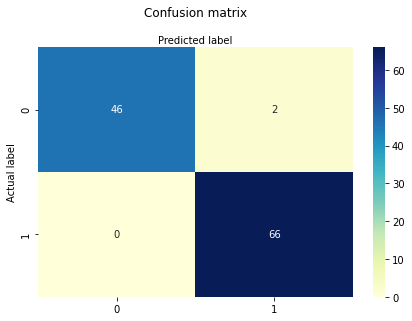

In [8]:
matrix_print(nonPCA_matrix)

In [9]:
#Problem 2

In [10]:
columns = ['principal component 1', 'principal component 2']
pca_data = create_pca(scled_x, raw_y, columns, 2)
pca_data

,principal component 1,principal component 2,cancer type
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign
...,...,...,...
564,6.439315,-3.576817,Benign
565,3.793382,-3.584048,Benign
566,1.256179,-1.902297,Benign
567,10.374794,1.672010,Benign


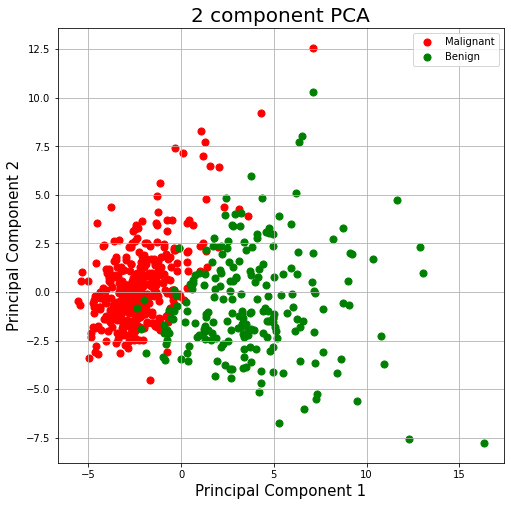

In [11]:
pca_x = pca_data[columns]
pca_y = pca_data['cancer type']

graph_pca(pca_data)

In [12]:
#Two principal components
pca_classifier, pca_matrix = log_reg(pca_x, pca_y)

Accuracy: 0.9473684210526315
Precision: 0.9166666666666666
Recall: 1.0
Matrix: 

 [[42  6]
 [ 0 66]]


In [13]:
#Three principal components
columns = ['1', '2', '3']
pca_data = create_pca(scled_x, raw_y, columns, 3)

pca_x = pca_data[columns]
pca_y = pca_data['cancer type']

pca_classifier, pca_matrix = log_reg(pca_x, pca_y)

Accuracy: 0.9385964912280702
Precision: 0.9402985074626866
Recall: 0.9545454545454546
Matrix: 

 [[44  4]
 [ 3 63]]


In [14]:
#Six principal components
columns = ['1', '2', '3', '4', '5','6']
pca_data = create_pca(scled_x, raw_y, columns, 6)

pca_x = pca_data[columns]
pca_y = pca_data['cancer type']

pca_classifier, pca_matrix = log_reg(pca_x, pca_y)

Accuracy: 0.9824561403508771
Precision: 0.9705882352941176
Recall: 1.0
Matrix: 

 [[46  2]
 [ 0 66]]


In [15]:
#I will be graphing the increase and then eventual decrease as you increase the pricpal componets
#I do not have enough time. I tend to like my code to look very neat and that takes a lot of time
#Although this does show how six prinicple compoments can have the same accuracy as 30 variables

In [16]:
#Problem 3

Accuracy: 0.956140350877193
Precision: 0.9366666666666666
Recall: 0.9964539007092199


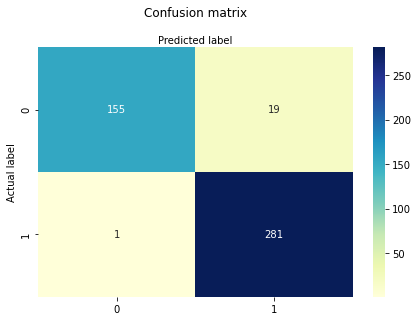

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=1)
LDA_t = LDA.fit_transform(breast.data, breast.target)

x_lda_train, x_lda_test, y_lda_train, y_lda_test = train_test_split(LDA_t, breast.target, test_size = 0.8)
LDA.fit(x_lda_train, y_lda_train)
y_pred = LDA.predict(x_lda_test)

metrics_print(y_pred, y_lda_test)

lda_matrix = confusion_matrix(y_lda_test, y_pred)

matrix_print(lda_matrix)

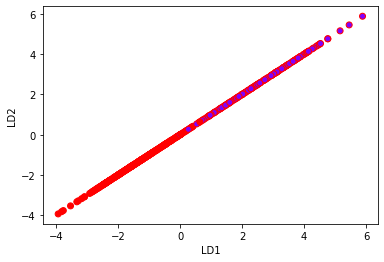

In [18]:
graph_lda(LDA_t)

In [19]:
from sklearn.naive_bayes import GaussianNB

NB_classifier = GaussianNB()
NB_classifier.fit(x_lda_train, y_lda_train)

GaussianNB()

In [20]:
#Uses the variables given from the lda to compute probablities using Naive Bayes

NB_y_pred = NB_classifier.predict(x_lda_test)
NB_matrix = confusion_matrix (y_lda_test, NB_y_pred)
print("NB_Matrix: \n\n", NB_matrix)

NB_Matrix: 

 [[164  10]
 [  3 279]]


In [21]:
metrics_print(NB_y_pred, y_lda_test)

Accuracy: 0.9714912280701754
Precision: 0.9653979238754326
Recall: 0.9893617021276596


In [22]:
#Problem 4

In [23]:
#Uses logistic regression classifier to make predictions
lda_classifier, lda_matrix = log_reg(LDA_t, raw_y)

Accuracy: 0.9649122807017544
Precision: 0.9428571428571428
Recall: 1.0
Matrix: 

 [[44  4]
 [ 0 66]]


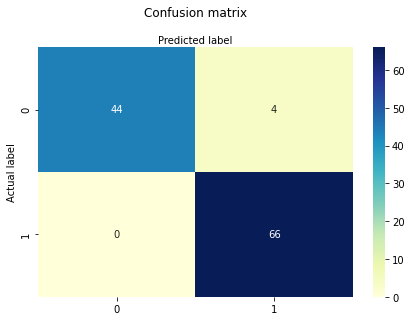

In [24]:
matrix_print(lda_matrix)